# Information on How These Data Are Organized:

`TypeOfResponse` refers to whether participants pressed a button ("APResp") or did not press a button ("APRespITI") within the given time frame.

`Version` refers to the task version. I never changed the JS code; I merely changed which face/house was labeled as S1_1, S1_2, S1_3, or S1_4 in respective task folders.

`LogCounter` gets added to whenever the JS records a new datapoint.

`TrialCounter` gets added to whenever a new trial has started. This is reset at the start of each block.

`MatrixCounter` gets added to throughout the task and is never reset. It is what I use to call Stimuli #s.

`RunCounter` refers to the run: 0 is run 1, 1 is run 2, 2 is run 3, and 3 is run 4.

`Valid` refers to the valid trial type. `Invalid` invalid trial type. This is in reference to the main manipulation of the S-S association phase, whereby particular faces and houses are more likely to precede particular scenes.

`Stimuli` refers to the S1 image presented here. Instead of Stim Type from the first experiment, I just coded this into the JS when I ran the second expt.

`StimPresented` refers to my matrix of possible trial types. For instance, 1 means stimulus 1 is associated with scene 1 (valid). 16 means stimulus 4 is associated with scene 3 (invalid).

`PressCorrect` refers to the button that participants should press on that trial. This is how I define accuracy (i.e., correct: when PressCorrect = actualkeyPressed).

`ResponseMatrix` refers to which key is pressed; this is a redundant variable and was used to make sure that each key had been required an equal number of times throughout the task.

`ActualKeyPressed` is what key subjects pressed.

`Accuracy` & `RT` self-explanatory.

`FeedbackType` refers to whether they got correct as fb, incorrect as fb, or the fb time-out.

`runStart` refers to the initiation of the countdown to begin the task.

`ImagePresent` refers to when the face/house was presented.

`StimTime` refers to when the scene was presented.

`RespOnset` refers to when a response was made.

`AccCount` is how I give subjects accurate fb of their performance at the end of each run (i.e., a counter that gets added to after each correct trial & is divided by trial #).

`Subject` self-explanatory.

One label isn't coded in the JS: `StimRep` looks for direct repetitions in the StimPresented matrix (i.e., if 15 comes twice in a row). This was coded in Matlab and added to the CSV file.

---

### Here we'll just import Python specific packages and read in our data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as plb
import math
from scipy import stats

%matplotlib notebook 

In [2]:
%cd 'C:\Users\cb383\Documents\controltransfer\expt2\data'
dat = pd.read_csv('AllSubsSS.csv')

C:\Users\cb383\Documents\controltransfer\expt2\data


# Do Some Basic Cleaning

#### We are filtering and preparing the data for analysis.

<u>FOR REACTION TIMES</u>:

-Select only `TypeOfResponse` equal to `Resp` (`ITI Resp` is when subs didn't respond).

-Only take the RTs that are greater than 200ms and less than 750 ms.

-Only take the RTs on accurate trials.

-Only take trials where the stimulus didn't repeat.


<u>FOR ACCURACY</u>:

-All errors are errors

In [3]:
cdat = dat.query('(TypeOfResponse != "APRespITI") & (RT > 200) & (RT < 750) & (Accuracy != 0) & (StimRep != 1)').copy()
adat = dat.copy()

In [4]:
#Note: these are the old valid/invalid pairings. They don't actually matter for this analysis, but for the sake of consistency,
#I have marked them in this data set as well...

adat['TrialType'] = adat['Valid'].isin([1])
adat.loc[adat['Valid'].isin([1]), 'TrialType'] = 'Valid'
adat.loc[~adat['Valid'].isin([1]), 'TrialType'] = 'Invalid'

cdat['TrialType'] = cdat['Valid'].isin([1])
cdat.loc[cdat['Valid'].isin([1]), 'TrialType'] = 'Valid'
cdat.loc[~cdat['Valid'].isin([1]), 'TrialType'] = 'Invalid'

In [5]:
adat['S2Image'] = adat['StimPresented'].isin([1])
adat.loc[adat['StimPresented'].isin([1]), 'S2Image'] = 'S2Image1'
adat.loc[adat['StimPresented'].isin([2]), 'S2Image'] = 'S2Image1'
adat.loc[adat['StimPresented'].isin([3]), 'S2Image'] = 'S2Image1'
adat.loc[adat['StimPresented'].isin([4]), 'S2Image'] = 'S2Image1'

adat.loc[adat['StimPresented'].isin([5]), 'S2Image'] = 'S2Image2'
adat.loc[adat['StimPresented'].isin([6]), 'S2Image'] = 'S2Image2'
adat.loc[adat['StimPresented'].isin([7]), 'S2Image'] = 'S2Image2'
adat.loc[adat['StimPresented'].isin([8]), 'S2Image'] = 'S2Image2'

adat.loc[adat['StimPresented'].isin([9]), 'S2Image'] = 'S2Image3'
adat.loc[adat['StimPresented'].isin([10]), 'S2Image'] = 'S2Image3'
adat.loc[adat['StimPresented'].isin([11]), 'S2Image'] = 'S2Image3'
adat.loc[adat['StimPresented'].isin([12]), 'S2Image'] = 'S2Image3'

adat.loc[adat['StimPresented'].isin([13]), 'S2Image'] = 'S2Image4'
adat.loc[adat['StimPresented'].isin([14]), 'S2Image'] = 'S2Image4'
adat.loc[adat['StimPresented'].isin([15]), 'S2Image'] = 'S2Image4'
adat.loc[adat['StimPresented'].isin([16]), 'S2Image'] = 'S2Image4'

cdat['S2Image'] = cdat['StimPresented'].isin([1])
cdat.loc[cdat['StimPresented'].isin([1]), 'S2Image'] = 'S2Image1'
cdat.loc[cdat['StimPresented'].isin([2]), 'S2Image'] = 'S2Image1'
cdat.loc[cdat['StimPresented'].isin([3]), 'S2Image'] = 'S2Image1'
cdat.loc[cdat['StimPresented'].isin([4]), 'S2Image'] = 'S2Image1'

cdat.loc[cdat['StimPresented'].isin([5]), 'S2Image'] = 'S2Image2'
cdat.loc[cdat['StimPresented'].isin([6]), 'S2Image'] = 'S2Image2'
cdat.loc[cdat['StimPresented'].isin([7]), 'S2Image'] = 'S2Image2'
cdat.loc[cdat['StimPresented'].isin([8]), 'S2Image'] = 'S2Image2'

cdat.loc[cdat['StimPresented'].isin([9]), 'S2Image'] = 'S2Image3'
cdat.loc[cdat['StimPresented'].isin([10]), 'S2Image'] = 'S2Image3'
cdat.loc[cdat['StimPresented'].isin([11]), 'S2Image'] = 'S2Image3'
cdat.loc[cdat['StimPresented'].isin([12]), 'S2Image'] = 'S2Image3'

cdat.loc[cdat['StimPresented'].isin([13]), 'S2Image'] = 'S2Image4'
cdat.loc[cdat['StimPresented'].isin([14]), 'S2Image'] = 'S2Image4'
cdat.loc[cdat['StimPresented'].isin([15]), 'S2Image'] = 'S2Image4'
cdat.loc[cdat['StimPresented'].isin([16]), 'S2Image'] = 'S2Image4'

# Look at Mean Validity Effects

### A validity effect means being faster and more accurate to respond when a face/house (S1) image validly cues its paired scene (S2) associate than when the scene is invalidly cued. Here, we do not expect any validity effects or any main effect of S1 image on scene categorization, because the S1-S2 pairs have been scrambled. All S1 images precede each S2 image an equal number of times.

In [6]:
sub_RTmeans = cdat.groupby(['subject','Stimuli'])['RT'].mean()
RTgrpmean = pd.Series.mean(sub_RTmeans,level=1)
RTgrpmean

Stimuli
1    582.297316
2    583.238240
3    582.537621
4    582.495962
Name: RT, dtype: float64

In [7]:
RTgrpstd = pd.Series.std(sub_RTmeans,level=1)
RTgrpstd

Stimuli
1    30.211051
2    28.719900
3    29.612680
4    29.453358
Name: RT, dtype: float64

In [8]:
n = math.sqrt(73)
RTstderror = RTgrpstd / n
RTstderror

Stimuli
1    3.535936
2    3.361410
3    3.465902
4    3.447255
Name: RT, dtype: float64

#### Judging by these initial numbers, there is no effect of S1 image on scene categorization. Is that true of Accuracy?

In [9]:
sub_ACCmeans = adat.groupby(['subject','Stimuli'])['Accuracy'].mean()
ACCgrpmean = pd.Series.mean(sub_ACCmeans,level=1)
ACCgrpmean

Stimuli
1    0.870320
2    0.873973
3    0.876712
4    0.875508
Name: Accuracy, dtype: float64

In [10]:
ACCgrpstd = pd.Series.std(sub_ACCmeans,level=1)
ACCgrpstd

Stimuli
1    0.072075
2    0.069887
3    0.074055
4    0.075373
Name: Accuracy, dtype: float64

In [11]:
ACCstderror = ACCgrpstd / n
ACCstderror

Stimuli
1    0.008436
2    0.008180
3    0.008667
4    0.008822
Name: Accuracy, dtype: float64

# Creating Variables to Run Statistics

#### This is a Python set of analyses, where the data above are organized in what's called "long-form" and to run statistics, I need "wide-form" data. So I am creating a new "dataframe" with the RT and accuracy means for valid and invalid trials, for each subject.

In [12]:
RTanalysis = pd.DataFrame()
lists = [[] for list in range(0,5)]

for ID in range(10,83):
    sub = cdat[cdat.subject == ID]
    lists[0].append(ID)
    Stim1_trials = sub[sub.Stimuli == 1].RT.mean()
    Stim2_trials = sub[sub.Stimuli == 2].RT.mean()
    Stim3_trials = sub[sub.Stimuli == 3].RT.mean()
    Stim4_trials = sub[sub.Stimuli == 4].RT.mean()
    lists[1].append(Stim1_trials)
    lists[2].append(Stim2_trials)
    lists[3].append(Stim3_trials)
    lists[4].append(Stim4_trials)
    
RTanalysis['SubjectID'] = lists[0]
RTanalysis['Stim1'] = lists[1]
RTanalysis['Stim2'] = lists[2]
RTanalysis['Stim3'] = lists[3]
RTanalysis['Stim4'] = lists[4]

In [13]:
#repeat for accuracy

ACCanalysis = pd.DataFrame()
new_lists = [[] for list in range(0,5)]

for ID in range(10,83):
    sub = adat[adat.subject == ID]
    new_lists[0].append(ID)
    ACC_Stim1_trials = sub[sub.Stimuli == 1].Accuracy.mean()
    ACC_Stim2_trials = sub[sub.Stimuli == 2].Accuracy.mean()
    ACC_Stim3_trials = sub[sub.Stimuli == 3].Accuracy.mean()
    ACC_Stim4_trials = sub[sub.Stimuli == 4].Accuracy.mean()
    new_lists[1].append(ACC_Stim1_trials)
    new_lists[2].append(ACC_Stim2_trials)
    new_lists[3].append(ACC_Stim3_trials)
    new_lists[4].append(ACC_Stim4_trials)
    
ACCanalysis['SubjectID'] = new_lists[0]
ACCanalysis['Stim1'] = new_lists[1]
ACCanalysis['Stim2'] = new_lists[2]
ACCanalysis['Stim3'] = new_lists[3]
ACCanalysis['Stim4'] = new_lists[4]

In [14]:
#now for run as well

RTrunanalysis = pd.DataFrame()
new_RTlists = [[] for list in range(0,6)]

for ID in range(10,83):
    sub = cdat[cdat.subject == ID]
    for runID in range(0,4):
        run = sub[sub.RunCounter == runID]
        new_RTlists[0].append(ID)
        new_RTlists[1].append(runID)
        RTStim1_trials = run[run.Stimuli == 1].RT.mean()
        RTStim2_trials = run[run.Stimuli == 2].RT.mean()
        RTStim3_trials = run[run.Stimuli == 3].RT.mean()
        RTStim4_trials = run[run.Stimuli == 4].RT.mean()
        new_RTlists[2].append(RTStim1_trials)
        new_RTlists[3].append(RTStim2_trials)
        new_RTlists[4].append(RTStim3_trials)
        new_RTlists[5].append(RTStim4_trials)
    
RTrunanalysis['SubjectID'] = new_RTlists[0]
RTrunanalysis['Run'] = new_RTlists[1]
RTrunanalysis['Stim1'] = new_RTlists[2]
RTrunanalysis['Stim2'] = new_RTlists[3]
RTrunanalysis['Stim3'] = new_RTlists[4]
RTrunanalysis['Stim4'] = new_RTlists[5]

In [15]:
#repeat for accuracy

ACCrunanalysis = pd.DataFrame()
new_acclists = [[] for list in range(0,6)]

for ID in range(10,83):
    sub = adat[adat.subject == ID]
    for runID in range(0,4):
        run = sub[sub.RunCounter == runID]
        new_acclists[0].append(ID)
        new_acclists[1].append(runID)
        ACCStim1_trials = run[run.Stimuli == 1].Accuracy.mean()
        ACCStim2_trials = run[run.Stimuli == 2].Accuracy.mean()
        ACCStim3_trials = run[run.Stimuli == 3].Accuracy.mean()
        ACCStim4_trials = run[run.Stimuli == 4].Accuracy.mean()
        new_acclists[2].append(ACCStim1_trials)
        new_acclists[3].append(ACCStim2_trials)
        new_acclists[4].append(ACCStim3_trials)
        new_acclists[5].append(ACCStim4_trials)
    
ACCrunanalysis['SubjectID'] = new_acclists[0]
ACCrunanalysis['Run'] = new_acclists[1]
ACCrunanalysis['Stim1'] = new_acclists[2]
ACCrunanalysis['Stim2'] = new_acclists[3]
ACCrunanalysis['Stim3'] = new_acclists[4]
ACCrunanalysis['Stim4'] = new_acclists[5]

# Run Actual Statistics

#### For the S-S phase, we run a repeated-measures ANOVA comparing S1 image (4) and S2 image (4): this will test whether there is any effect of S1 image on scene categorization. 

Unfortunately, Python does not have the capability for repeated-measures ANOVA. I could install "pyvtttbl" for Python, but it's not as accurate as R, SPSS, etc. So in this particular notebook, I will run paired t-tests to mimic the lack of main effect of S1 image, and I will include R code to run the actual ANOVA.

In [16]:
#paired t-tests for RT; if you want to look at any individual result, remove the semicolon.
stats.ttest_rel(RTanalysis.Stim1, RTanalysis.Stim2);
stats.ttest_rel(RTanalysis.Stim1, RTanalysis.Stim3);
stats.ttest_rel(RTanalysis.Stim1, RTanalysis.Stim4);
stats.ttest_rel(RTanalysis.Stim2, RTanalysis.Stim3);
stats.ttest_rel(RTanalysis.Stim2, RTanalysis.Stim4);
stats.ttest_rel(RTanalysis.Stim3, RTanalysis.Stim4);

In [17]:
stats.ttest_rel(ACCanalysis.Stim1, ACCanalysis.Stim2);
stats.ttest_rel(ACCanalysis.Stim1, ACCanalysis.Stim3);
stats.ttest_rel(ACCanalysis.Stim1, ACCanalysis.Stim4);
stats.ttest_rel(ACCanalysis.Stim2, ACCanalysis.Stim3);
stats.ttest_rel(ACCanalysis.Stim2, ACCanalysis.Stim4);
stats.ttest_rel(ACCanalysis.Stim3, ACCanalysis.Stim4);

In [18]:
#can look at more things, like Bayesian confidence intervals
stats.bayes_mvs(RTanalysis.Stim1);
stats.bayes_mvs(RTanalysis.Stim2);
stats.bayes_mvs(RTanalysis.Stim3);
stats.bayes_mvs(RTanalysis.Stim4);
stats.bayes_mvs(ACCanalysis.Stim1);
stats.bayes_mvs(ACCanalysis.Stim2);
stats.bayes_mvs(ACCanalysis.Stim3);
stats.bayes_mvs(ACCanalysis.Stim4);

#### In sum: no main effect of S1 image on RT or accuracy. See below for actual R ANOVA analyses (i.e., what was actually run in the paper).

# Look at the Results Graphically

Note that the graphs generated mimic the paper, but I used Matlab to generate the figures, because I like their graphics more.

In [19]:
sns.set(context='notebook', style='white', font='Myriad Pro', font_scale=2, color_codes=False, rc=None);

<IPython.core.display.Javascript object>


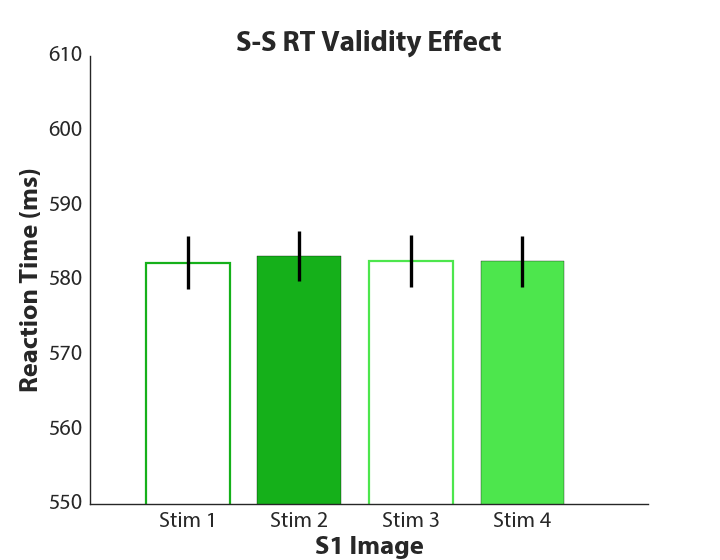

In [20]:
barwidth = 0.75; 
fig, ax = plt.subplots(figsize=(9, 7));
rects1 = ax.bar(0.5,RTanalysis.Stim1.mean(),barwidth,yerr=RTstderror[1],ecolor='k',edgecolor=sns.xkcd_rgb['green'],linewidth = 2, facecolor='none',error_kw=dict(lw=3),label='Congruent');
rects2 = ax.bar(1.5,RTanalysis.Stim2.mean(),barwidth,color=sns.xkcd_rgb['green'],yerr=RTstderror[2],ecolor='k',error_kw=dict(lw=3),label='Incongruent');
rects3 = ax.bar(2.5,RTanalysis.Stim3.mean(),barwidth,yerr=RTstderror[3],ecolor='k',edgecolor=(0.3,0.9,0.3),linewidth = 2, facecolor='none',error_kw=dict(lw=3));
rects4 = ax.bar(3.5,RTanalysis.Stim4.mean(),barwidth,color=(0.3,0.9,0.3),yerr=RTstderror[4],ecolor='k',error_kw=dict(lw=3));
sns.set(context='notebook', style='white', font='Myriad Pro', font_scale=2, color_codes=False, rc=None);
ax.set_ylim(550,610);
ax.set_xlim(0,5);
ax.set_xticklabels(('Stim 1', 'Stim 2', 'Stim 3', 'Stim 4'));
ax.set_xticks([0.5 + barwidth/2, 1.5 + barwidth/2,2.5 + barwidth/2,3.5 + barwidth/2]);
ax.set_yticks(np.arange(550, 611, 10));
plt.title('S-S RT Validity Effect', fontsize=26,fontweight="bold")
plt.ylabel('Reaction Time (ms)', fontsize=24,fontweight="bold")
plt.xlabel('S1 Image', fontsize=24,fontweight="bold")
sns.despine();

plt.show()

<IPython.core.display.Javascript object>


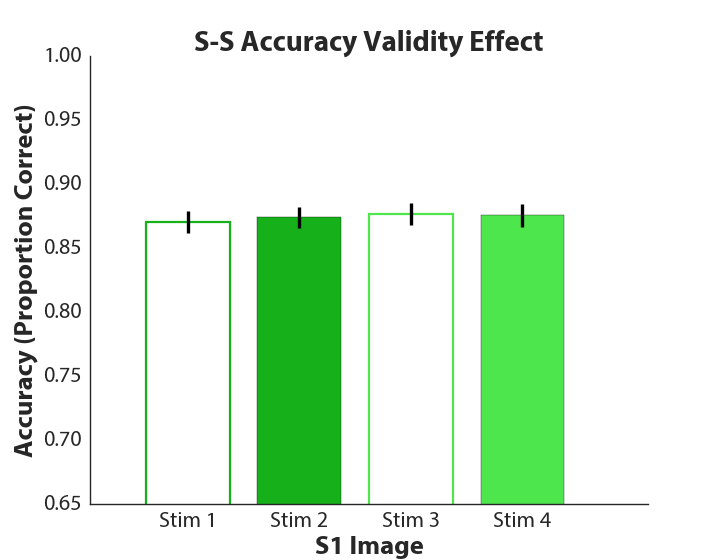

In [21]:
barwidth = 0.75; 
fig, ax = plt.subplots(figsize=(9, 7));
rects1 = ax.bar(0.5,ACCanalysis.Stim1.mean(),barwidth,yerr=ACCstderror[1],ecolor='k',edgecolor=sns.xkcd_rgb['green'],linewidth = 2, facecolor='none',error_kw=dict(lw=3),label='Congruent');
rects2 = ax.bar(1.5,ACCanalysis.Stim2.mean(),barwidth,color=sns.xkcd_rgb['green'],yerr=ACCstderror[2],ecolor='k',error_kw=dict(lw=3),label='Incongruent');
rects3 = ax.bar(2.5,ACCanalysis.Stim3.mean(),barwidth,yerr=ACCstderror[3],ecolor='k',edgecolor=(0.3,0.9,0.3),linewidth = 2, facecolor='none',error_kw=dict(lw=3));
rects4 = ax.bar(3.5,ACCanalysis.Stim4.mean(),barwidth,color=(0.3,0.9,0.3),yerr=ACCstderror[4],ecolor='k',error_kw=dict(lw=3));
sns.set(context='notebook', style='white', font='Myriad Pro', font_scale=2, color_codes=False, rc=None);
ax.set_ylim(0.65,1.00);
ax.set_xlim(0,5);
ax.set_xticklabels(('Stim 1', 'Stim 2', 'Stim 3', 'Stim 4'));
ax.set_xticks([0.5 + barwidth/2, 1.5 + barwidth/2,2.5 + barwidth/2,3.5 + barwidth/2]);
ax.set_yticks(np.arange(0.65, 1.01, 0.05));
plt.title('S-S Accuracy Validity Effect', fontsize=26,fontweight="bold")
plt.ylabel('Accuracy (Proportion Correct)', fontsize=24,fontweight="bold")
plt.xlabel('S1 Image', fontsize=24,fontweight="bold")
sns.despine();

plt.show()

# Making CSV Copies of the Data

If you like handling the data yourself, these CSVs organize the data by the relevant variables.

In [22]:
%cd 'csvdata'

C:\Users\cb383\Documents\controltransfer\expt2\data\csvdata


In [23]:
subrunmeans = cdat.groupby(['subject','Stimuli'])['RT'].mean()
subrunmeans1 = cdat.groupby(['subject','RunCounter','Stimuli'])['RT'].mean()
subrunmeans2 = cdat.groupby(['subject','Stimuli','S2Image'])['RT'].mean()
subrunmeans3 = cdat.groupby(['subject','RunCounter','Stimuli','S2Image'])['RT'].mean()
subrunmedians = cdat.groupby(['subject','Stimuli'])['RT'].median()
subrunmedians1 = cdat.groupby(['subject','RunCounter','Stimuli'])['RT'].median()
subrunmedians2 = cdat.groupby(['subject','Stimuli','S2Image'])['RT'].median()
subrunmedians3 = cdat.groupby(['subject','RunCounter','Stimuli','S2Image'])['RT'].median()

subrunmeans.to_csv('SS_RTsubrunmeans_subStim.csv')
subrunmeans1.to_csv('SS_RTsubrunmeans_subRunStim.csv')
subrunmeans2.to_csv('SS_RTsubrunmeans_subStimStimPres.csv')
subrunmeans3.to_csv('SS_RTsubrunmeans_subRunStimStimPres.csv')
subrunmedians.to_csv('SS_RTsubrunmedians_subStim.csv')
subrunmedians1.to_csv('SS_RTsubrunmedians_subRunStim.csv')
subrunmedians2.to_csv('SS_RTsubrunmedians_subStimStimPres.csv')
subrunmedians3.to_csv('SS_RTsubrunmedians_subRunStimStimPres.csv')

subaccmeans = adat.groupby(['subject','Stimuli'])['Accuracy'].mean()
subaccmeans1 = adat.groupby(['subject','RunCounter','Stimuli'])['Accuracy'].mean()
subaccmeans2 = adat.groupby(['subject','Stimuli','S2Image'])['Accuracy'].mean()
subaccmeans3 = adat.groupby(['subject','RunCounter','Stimuli','S2Image'])['Accuracy'].mean()
subaccmeans.to_csv('SS_ACCsubrunmeans_subStim.csv')
subaccmeans1.to_csv('SS_ACCsubrunmeans_subRunStim.csv')
subaccmeans2.to_csv('SS_ACCsubrunmeans_subStimStimPres.csv')
subaccmeans3.to_csv('SS_ACCsubrunmeans_subRunStimStimPres.csv')

## Running ANOVAs in R

In [24]:
AN_sub_RTmeans = cdat.groupby(['subject','Stimuli','S2Image'])['RT'].mean();
AN_sub_ACCmeans = adat.groupby(['subject','Stimuli','S2Image'])['Accuracy'].mean();

#create tidy data csvs
AN_sub_RTmeans.to_csv('SS_ANOVA_RT.csv')
AN_sub_ACCmeans.to_csv('SS_ANOVA_ACC.csv')

#create headers for the tidy data csvs, for analysis purposes
import csv
with open('SS_ANOVA_RT.csv',newline='') as f:
    r = csv.reader(f)
    data = [line for line in r]
with open('SS_ANOVA_RT.csv','w',newline='') as f:
    w = csv.writer(f)
    w.writerow(["subject", "s1image", "s2image", "rt"])
    w.writerows(data)

with open('SS_ANOVA_ACC.csv',newline='') as f:
    r = csv.reader(f)
    data = [line for line in r]
with open('SS_ANOVA_ACC.csv','w',newline='') as f:
    w = csv.writer(f)
    w.writerow(["subject", "s1image", "s2image", "acc"])
    w.writerows(data)

In [25]:
%%writefile SSAnova.R

rawRTData <- read.csv('SS_ANOVA_RT.csv')
install.packages("psych",repos='https://mirrors.nics.utk.edu/cran/')
install.packages("ez",repos='https://mirrors.nics.utk.edu/cran/')
library(psych)
library(ez)

rawRTData$subject = as.factor(rawRTData$subject)
rawRTData$s1image = as.factor(rawRTData$s1image)
rawRTData$s2image = as.factor(rawRTData$s2image)

SS_RT_runANOVA <- ezANOVA(data=as.data.frame(rawRTData),
                                  dv=rt,
                                  wid=subject,
                                  within=.(s1image, s2image),
                                  detailed=TRUE)
print(SS_RT_runANOVA)

rawACCData <- read.csv('SS_ANOVA_ACC.csv')

rawACCData$subject = as.factor(rawACCData$subject)
rawACCData$s1image = as.factor(rawACCData$s1image)
rawACCData$s2image = as.factor(rawACCData$s2image)

SS_ACC_runANOVA <- ezANOVA(data=as.data.frame(rawACCData),
                                  dv=acc,
                                  wid=subject,
                                  within=.(s1image, s2image),
                                  detailed=TRUE)
print(SS_ACC_runANOVA)

Writing SSAnova.R


In [26]:
! Rscript SSAnova.R

package 'psych' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\cb383\AppData\Local\Temp\RtmpQxSVqE\downloaded_packages
package 'ez' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\cb383\AppData\Local\Temp\RtmpQxSVqE\downloaded_packages
$ANOVA
           Effect DFn DFd          SSn       SSd            F            p
1     (Intercept)   1  72 3.972732e+08 965590.22 2.962299e+04 6.601640e-96
2         s1image   3 216 2.417001e+02  50411.82 3.452049e-01 7.926566e-01
3         s2image   3 216 9.346053e+04 322186.37 2.088592e+01 6.407035e-12
4 s1image:s2image   9 648 2.439270e+03 191529.49 9.169735e-01 5.096736e-01
  p<.05          ges
1     * 0.9961642263
2       0.0001579781
3     * 0.0575787181
4       0.0015920497

$`Mauchly's Test for Sphericity`
           Effect         W         p p<.05
2         s1image 0.9575513 0.6895908      
3         s2image 0.9754972 0.8819801      
4 s1image:s2image 0.56

trying URL 'https://mirrors.nics.utk.edu/cran/bin/windows/contrib/3.3/psych_1.7.5.zip'
Content type 'application/zip' length 3966532 bytes (3.8 MB)
downloaded 3.8 MB

trying URL 'https://mirrors.nics.utk.edu/cran/bin/windows/contrib/3.3/ez_4.4-0.zip'
Content type 'application/zip' length 304848 bytes (297 KB)
downloaded 297 KB

Warning message:
package 'psych' was built under R version 3.3.3 
Warning message:
package 'ez' was built under R version 3.3.3 


# Making 95% Confidence Intervals

In [27]:
import statsmodels.stats.api as sms

a = RTanalysis.Stim1.mean()
sms.DescrStatsW(RTanalysis.Stim1).tconfint_mean()
#a

(575.24855628369187, 589.34607576113308)

In [28]:
a = RTanalysis.Stim2.mean()
sms.DescrStatsW(RTanalysis.Stim2).tconfint_mean()
#a

(576.53739158721669, 589.93908845381998)

In [29]:
a = RTanalysis.Stim3.mean()
sms.DescrStatsW(RTanalysis.Stim3).tconfint_mean()
#a

(575.6284717945606, 589.44677073149808)

In [30]:
a = RTanalysis.Stim4.mean()
sms.DescrStatsW(RTanalysis.Stim4).tconfint_mean()
#a

(575.62398557103393, 589.3679393215134)

In [31]:
a = RTrunanalysis.loc[RTrunanalysis['Run'] == 0].Stim1.mean()
sms.DescrStatsW(RTrunanalysis.loc[RTrunanalysis['Run'] == 0].Stim1).tconfint_mean()
#a

(579.88705079070303, 598.6095161127131)

In [32]:
a = RTrunanalysis.loc[RTrunanalysis['Run'] == 0].Stim2.mean()
sms.DescrStatsW(RTrunanalysis.loc[RTrunanalysis['Run'] == 0].Stim2).tconfint_mean()
#a

(579.28374844750567, 596.22233238186266)

In [33]:
a = RTrunanalysis.loc[RTrunanalysis['Run'] == 0].Stim3.mean()
#sms.DescrStatsW(RTrunanalysis.loc[RTrunanalysis['Run'] == 0].Stim3).tconfint_mean()
## NOTE: one subject did not have a single trial for Stim 3 that was *correct* on run 1, so this confidence interval method
## did not work. I have calculated like this because it excludes that subject in its calculation.
b = RTrunanalysis.loc[RTrunanalysis['Run'] == 0].Stim3.std()
stderror = b / n;
CI = stderror * 1.96;
UCI = a + CI
LCI = a - CI

In [34]:
a = RTrunanalysis.loc[RTrunanalysis['Run'] == 0].Stim4.mean()
sms.DescrStatsW(RTrunanalysis.loc[RTrunanalysis['Run'] == 0].Stim4).tconfint_mean()
#a

(588.78689655354276, 607.47670833471955)

In [35]:
a = RTrunanalysis.loc[RTrunanalysis['Run'] == 1].Stim1.mean()
sms.DescrStatsW(RTrunanalysis.loc[RTrunanalysis['Run'] == 1].Stim1).tconfint_mean()
#a

(576.89438116176029, 592.34020046665705)

In [36]:
a = RTrunanalysis.loc[RTrunanalysis['Run'] == 1].Stim2.mean()
sms.DescrStatsW(RTrunanalysis.loc[RTrunanalysis['Run'] == 1].Stim2).tconfint_mean()
#a

(579.18589629109238, 595.61472089993572)

In [37]:
a = RTrunanalysis.loc[RTrunanalysis['Run'] == 1].Stim3.mean()
sms.DescrStatsW(RTrunanalysis.loc[RTrunanalysis['Run'] == 1].Stim3).tconfint_mean()
#a

(573.1753425047018, 589.59465705433877)

In [38]:
a = RTrunanalysis.loc[RTrunanalysis['Run'] == 1].Stim4.mean()
sms.DescrStatsW(RTrunanalysis.loc[RTrunanalysis['Run'] == 1].Stim4).tconfint_mean()
#a

(573.5237520146535, 590.6069693188075)

In [39]:
a = RTrunanalysis.loc[RTrunanalysis['Run'] == 2].Stim1.mean()
sms.DescrStatsW(RTrunanalysis.loc[RTrunanalysis['Run'] == 2].Stim1).tconfint_mean()
#a

(574.26564777564022, 590.11694451791095)

In [40]:
a = RTrunanalysis.loc[RTrunanalysis['Run'] == 2].Stim2.mean()
sms.DescrStatsW(RTrunanalysis.loc[RTrunanalysis['Run'] == 2].Stim2).tconfint_mean()
#a

(573.23791015842096, 588.20242484903713)

In [41]:
a = RTrunanalysis.loc[RTrunanalysis['Run'] == 2].Stim3.mean()
sms.DescrStatsW(RTrunanalysis.loc[RTrunanalysis['Run'] == 2].Stim3).tconfint_mean()
#a

(573.65022099604687, 589.20407508838628)

In [42]:
a = RTrunanalysis.loc[RTrunanalysis['Run'] == 2].Stim4.mean()
sms.DescrStatsW(RTrunanalysis.loc[RTrunanalysis['Run'] == 2].Stim4).tconfint_mean()
#a

(572.06452440245516, 585.98989013278128)

In [43]:
a = RTrunanalysis.loc[RTrunanalysis['Run'] == 3].Stim1.mean()
sms.DescrStatsW(RTrunanalysis.loc[RTrunanalysis['Run'] == 3].Stim1).tconfint_mean()
#a

(566.31344587838862, 583.14071731002127)

In [44]:
a = RTrunanalysis.loc[RTrunanalysis['Run'] == 3].Stim2.mean()
sms.DescrStatsW(RTrunanalysis.loc[RTrunanalysis['Run'] == 3].Stim2).tconfint_mean()
#a

(570.51884757027744, 585.1432816247285)

In [45]:
a = RTrunanalysis.loc[RTrunanalysis['Run'] == 3].Stim3.mean()
sms.DescrStatsW(RTrunanalysis.loc[RTrunanalysis['Run'] == 3].Stim3).tconfint_mean()
#a

(568.78040863698038, 583.93536235002352)

In [46]:
a = RTrunanalysis.loc[RTrunanalysis['Run'] == 3].Stim4.mean()
sms.DescrStatsW(RTrunanalysis.loc[RTrunanalysis['Run'] == 3].Stim4).tconfint_mean()
#a

(567.45350333656722, 583.59338584730824)

And for Accuracy...

In [47]:
a = ACCanalysis.Stim1.mean()
sms.DescrStatsW(ACCanalysis.Stim1).tconfint_mean()
#a

(0.85350329591289353, 0.88713597349349926)

In [48]:
a = ACCanalysis.Stim2.mean()
sms.DescrStatsW(ACCanalysis.Stim2).tconfint_mean()
#a

(0.85766682465174171, 0.89027838082771027)

In [49]:
a = ACCanalysis.Stim3.mean()
sms.DescrStatsW(ACCanalysis.Stim3).tconfint_mean()
#a

(0.85943408220673367, 0.8939905753275128)

In [50]:
a = ACCanalysis.Stim4.mean()
sms.DescrStatsW(ACCanalysis.Stim4).tconfint_mean()
#a

(0.85792199651659773, 0.89309359157976498)

In [51]:
a = ACCrunanalysis.loc[RTrunanalysis['Run'] == 0].Stim1.mean()
sms.DescrStatsW(ACCrunanalysis.loc[RTrunanalysis['Run'] == 0].Stim1).tconfint_mean()
#a

(0.66673454961172696, 0.75609650061658362)

In [52]:
a = ACCrunanalysis.loc[RTrunanalysis['Run'] == 0].Stim2.mean()
sms.DescrStatsW(ACCrunanalysis.loc[RTrunanalysis['Run'] == 0].Stim2).tconfint_mean()
#a

(0.69559766557625169, 0.7783749371634745)

In [53]:
a = ACCrunanalysis.loc[RTrunanalysis['Run'] == 0].Stim3.mean()
sms.DescrStatsW(ACCrunanalysis.loc[RTrunanalysis['Run'] == 0].Stim3).tconfint_mean()
#a

(0.6793020826556998, 0.77640567990137799)

In [54]:
a = ACCrunanalysis.loc[RTrunanalysis['Run'] == 0].Stim4.mean()
sms.DescrStatsW(ACCrunanalysis.loc[RTrunanalysis['Run'] == 0].Stim4).tconfint_mean()
#a

(0.67599892465579892, 0.76874993379168965)

In [55]:
a = ACCrunanalysis.loc[RTrunanalysis['Run'] == 1].Stim1.mean()
sms.DescrStatsW(ACCrunanalysis.loc[RTrunanalysis['Run'] == 1].Stim1).tconfint_mean()
#a

(0.88613024259408069, 0.9293948715611704)

In [56]:
a = ACCrunanalysis.loc[RTrunanalysis['Run'] == 1].Stim2.mean()
sms.DescrStatsW(ACCrunanalysis.loc[RTrunanalysis['Run'] == 1].Stim2).tconfint_mean()
#a

(0.88294212697489272, 0.92345056708903384)

In [57]:
a = ACCrunanalysis.loc[RTrunanalysis['Run'] == 1].Stim3.mean()
sms.DescrStatsW(ACCrunanalysis.loc[RTrunanalysis['Run'] == 1].Stim3).tconfint_mean()
#a

(0.89271687797502353, 0.93376714028981633)

In [58]:
a = ACCrunanalysis.loc[RTrunanalysis['Run'] == 1].Stim4.mean()
sms.DescrStatsW(ACCrunanalysis.loc[RTrunanalysis['Run'] == 1].Stim4).tconfint_mean()
#a

(0.89579719901596722, 0.93433978728540268)

In [59]:
a = ACCrunanalysis.loc[RTrunanalysis['Run'] == 2].Stim1.mean()
sms.DescrStatsW(ACCrunanalysis.loc[RTrunanalysis['Run'] == 2].Stim1).tconfint_mean()
#a

(0.91373933493351978, 0.94927436369661711)

In [60]:
a = ACCrunanalysis.loc[RTrunanalysis['Run'] == 2].Stim2.mean()
sms.DescrStatsW(ACCrunanalysis.loc[RTrunanalysis['Run'] == 2].Stim2).tconfint_mean()
#a

(0.8958963983077689, 0.93606707201186568)

In [61]:
a = ACCrunanalysis.loc[RTrunanalysis['Run'] == 2].Stim3.mean()
sms.DescrStatsW(ACCrunanalysis.loc[RTrunanalysis['Run'] == 2].Stim3).tconfint_mean()
#a

(0.90589787764587271, 0.94433043285641027)

In [62]:
a = ACCrunanalysis.loc[RTrunanalysis['Run'] == 2].Stim4.mean()
sms.DescrStatsW(ACCrunanalysis.loc[RTrunanalysis['Run'] == 2].Stim4).tconfint_mean()
#a

(0.91007501742015295, 0.9418493139562335)

In [63]:
a = ACCrunanalysis.loc[RTrunanalysis['Run'] == 3].Stim1.mean()
sms.DescrStatsW(ACCrunanalysis.loc[RTrunanalysis['Run'] == 3].Stim1).tconfint_mean()
#a

(0.91182081403567594, 0.94936640057619626)

In [64]:
a = ACCrunanalysis.loc[RTrunanalysis['Run'] == 3].Stim2.mean()
sms.DescrStatsW(ACCrunanalysis.loc[RTrunanalysis['Run'] == 3].Stim2).tconfint_mean()
#a

(0.92392199795916152, 0.9555300568353593)

In [65]:
a = ACCrunanalysis.loc[RTrunanalysis['Run'] == 3].Stim3.mean()
sms.DescrStatsW(ACCrunanalysis.loc[RTrunanalysis['Run'] == 3].Stim3).tconfint_mean()
#a

(0.92517977533171769, 0.95609876348106781)

In [66]:
a = ACCrunanalysis.loc[RTrunanalysis['Run'] == 3].Stim4.mean()
sms.DescrStatsW(ACCrunanalysis.loc[RTrunanalysis['Run'] == 3].Stim4).tconfint_mean()
#a

(0.91811905495622892, 0.95924558953170302)